# Computer Vision & Deep Learning - SEP Practical

## Exercise Sheet 2: Image operations

**Due on 09.11., 10:00**

## Important notes

- Email: Frequently check your email address registered for Moodle. All notifications regarding the course will be sent via Moodle.
- Moodle: Please use the Moodle platform and post your questions to the forum. They will be answered by us or your fellow students.
-  Submission: Put your code and potentially other materials inside a single ZIP file. If you use jupyter notebooks, please always create a PDF file and include it in your ZIP file. The final submission should therefore be a **single zip** file with a **PDF of your code** and the **original code** inside. The ZIP file should contain your surname and your matriculation number (Surname-MatriculationNumber.zip). Submissions that fail to follow the naming convention will not be graded!



## 0. Preparation (1)
In the upcoming lectures and exercises we will heavily make use of the following packages. If you have not worked with them yet, please go through some Python tutorials to familiarize yourself with the syntax and basic data structures.

- `NumPy`: Defines multi-dimensional arrays and provides efficient functions to operate on them (see [NumPy documentation](https://numpy.org/)).
- `Matplotlib`: Provides plotting functions (see [Matplotlib documentation](https://matplotlib.org/)).
- `Pillow`: Python Imaging Library that allows you to load, save, crop, and resize images (and much more). You can convert NumPy arrays to PIL images and vice versa. Note that Pillow only accepts NumPy arrays in `uint8` format (unsigned 8-bit integer) with each pixel value in range [0, 255] (see [Pillow documentation](https://pillow.readthedocs.io/en/stable/)).

This is a free point so you don't have to implement anything for this task, but please take it seriously and familiarize yourself with these packages!

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

---
## 1. Simple Image Operations (8)

### 1.1 Image Loading (1)
As a first step, please load the image `Capybara.jpg` with the `Pillow` package and convert it to a numpy array. Print the height, width, and number of channels of the image.

In [17]:
img = Image.open('Capybara.jpg')
array = np.asarray(img)
print(array.shape)

height = array.shape[0]
width = array.shape[1]
channels = array.shape[2]
print(f'Height: {height}, Width: {width}, Channels: {channels}')

(600, 800, 3)
Height: 600, Width: 800, Channels: 3


### 1.2 Visualization (1)

Plot the image with `matplotlib` and include the height, width, and number of channels in the title like $H \times W \times C$.

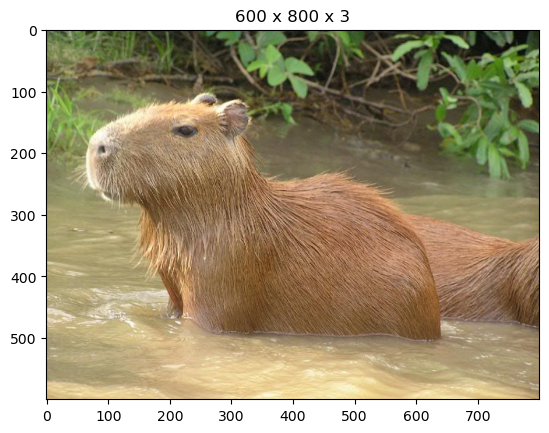

In [18]:
plt.title(f"{height} x {width} x {channels}")
plt.imshow(array)
plt.show()

### 1.3 Crop Image (1)

Please plot a random crop of size $256 \times 256$ of the image.

Random patch:


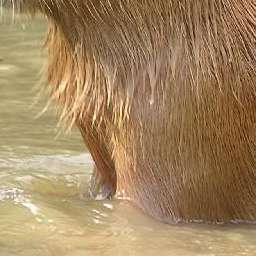

In [19]:
# Determine the patch coordinates
patch_height = 256
patch_width = 256
h = np.random.randint(0, height - patch_height)
w = np.random.randint(0, width - patch_width)

# Crop the patch and display
patch_array = array[h:h + patch_height, w:w + patch_width]
patch = Image.fromarray(patch_array)

print('Random patch:')
display(patch)

### 1.4 Gray-scale (1)

Convert the cropped out image patch to grayscale and plot it.

Grayscale patch:


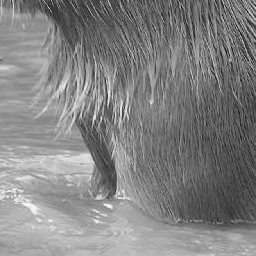

In [20]:
patch_array = np.mean(patch_array, axis=2)
gray_patch_img = Image.fromarray(patch_array.astype(np.uint8))

print('Grayscale patch:')
display(gray_patch_img)

### 1.5 Insertion (3)

Insert the grayscale patch back into the original image (note that the grayscale patch only has one channel) and plot it.

*Hint*: You can use the `np.repeat` function to repeat the grayscale patch along the channel axis.

Original image with the inserted grayscale patch:


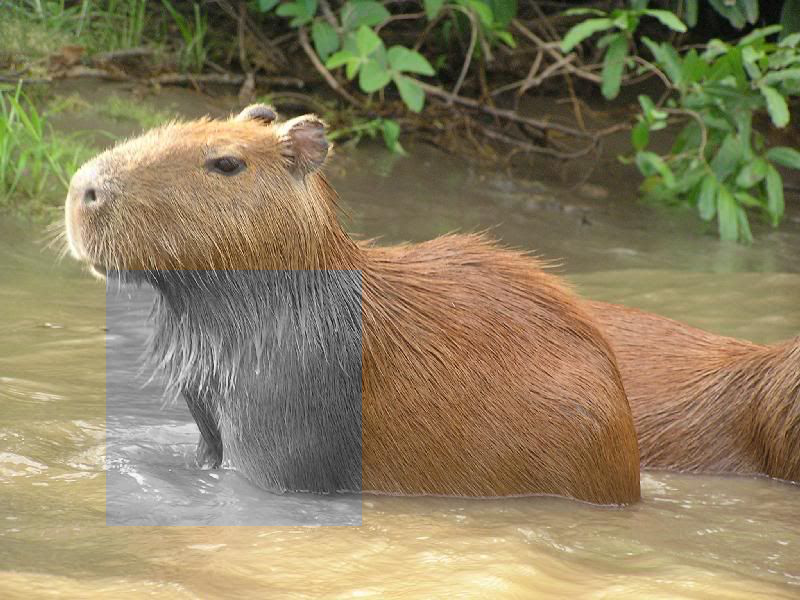

In [21]:
new_array = np.copy(array)
# replace the original patch with the gray scale one
# patch array has only one channel. You can either do this or do it e.g. with a for-loop
new_array[h:h + patch_height, w:w + patch_width] = np.repeat(patch_array[:, :, np.newaxis], 3, axis=2)
new_img = Image.fromarray(new_array)

print('Original image with the inserted grayscale patch:')
display(new_img)

### 1.6 Resizing (1)
Resize the image with the inserted grayscale patch with a factor of $1/2$ for both, height and width. Plot the resized image.

Resized image with the inserted grayscale patch:


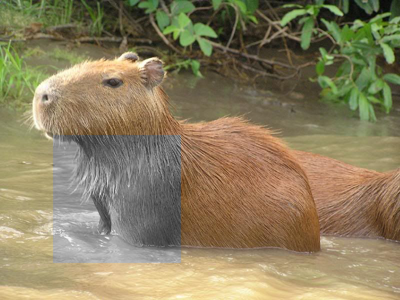

In [22]:
resized_img = new_img.resize((width // 2, height // 2))

print('Resized image with the inserted grayscale patch:')
display(resized_img)

---
## 2. Histogram (6)

In the lecture we learned that we can also represent images as histograms. In this exercise we will implement a simple histogram computation and plot it.

### 2.1 Histogram Computation (3)

Please write a function that takes a single channel image (2D `numpy` array) and computes the histogram of it. The function should return a list of length $256$ where each entry corresponds to the number of pixels with the corresponding intensity value. Plot the histogram of the image `Capybara.jpg` per channel. Please use the `matplotlib` function `plt.subplots(...)` for that, so that you have all three histograms (RGB) in one figure. Also make sure to colorize the histograms according to the color they represent, e.g. the histogram of the blue channel should be blue.

In [24]:
def compute_histogram(im_arr):
    histogram = np.zeros(256)
    for i in range(im_arr.shape[0]):
        for j in range(im_arr.shape[1]):
            histogram[im_arr[i, j]] += 1
    return histogram

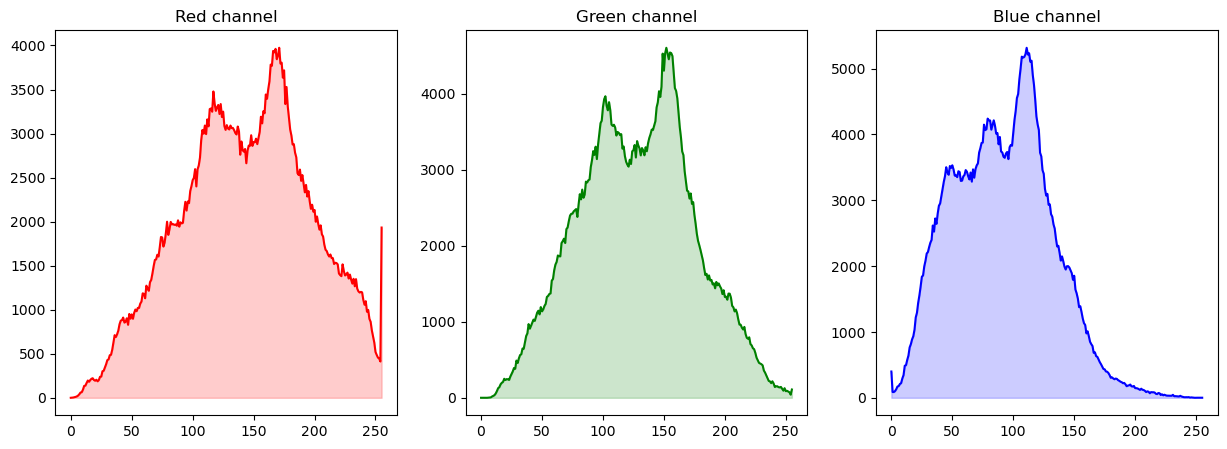

In [34]:
# plot the histogram of the image per channel
hist_ch_1 = compute_histogram(array[:, :, 0])
hist_ch_2 = compute_histogram(array[:, :, 1])
hist_ch_3 = compute_histogram(array[:, :, 2])

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# red channel
axs[0].plot(hist_ch_1, color='red')
axs[0].fill_between(range(256), hist_ch_1, color='red', alpha=0.2)
axs[0].set_title('Red channel')

# green channel
axs[1].plot(hist_ch_2, color='green')
axs[1].fill_between(range(256), hist_ch_2, color='green', alpha=0.2)
axs[1].set_title('Green channel')

# blue channel
axs[2].plot(hist_ch_3, color='blue')
axs[2].fill_between(range(256), hist_ch_3, color='blue', alpha=0.2)
axs[2].set_title('Blue channel')

plt.show()

### 2.2 Shifting Color Channels (3)

Please write a function that takes an image and shifts a specific channel by a given value. Make sure that the values are still in the valid range of [0, 255].

We can see that in the `Capybara.jpg` image we only have few pixels with a high intensity value in the blue channel. Please shift the blue channel by $+25$ and plot the histogram of the shifted image. Furthermore, plot the original and the shifted image side-by-side for comparison.

In [66]:
def shift_channel(im_arr, channel, shift):
    shifted_im_arr = np.copy(im_arr)
    shifted_im_arr[:, :, channel] += shift
    shifted_im_arr = np.clip(shifted_im_arr, 0, 255)
    return shifted_im_arr

In [67]:
# shift the red channel to the left
shifted_array = shift_channel(array, 2, 25)

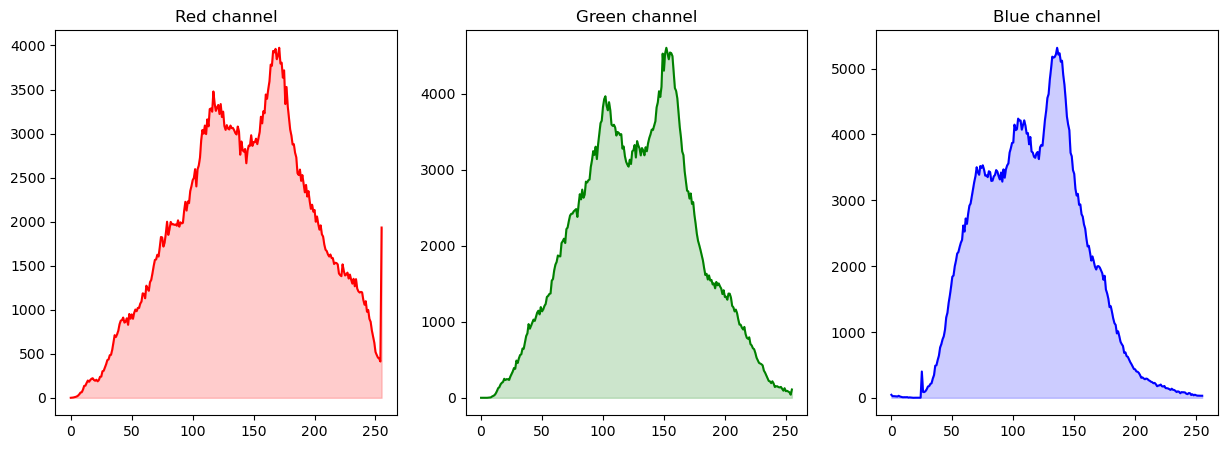

In [64]:
# plot the histogram of the shifted image
hist_ch_1 = compute_histogram(shifted_array[:, :, 0])
hist_ch_2 = compute_histogram(shifted_array[:, :, 1])
hist_ch_3 = compute_histogram(shifted_array[:, :, 2])

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# red channel
axs[0].plot(hist_ch_1, color='red')
axs[0].fill_between(range(256), hist_ch_1, color='red', alpha=0.2)
axs[0].set_title('Red channel')

# green channel
axs[1].plot(hist_ch_2, color='green')
axs[1].fill_between(range(256), hist_ch_2, color='green', alpha=0.2)
axs[1].set_title('Green channel')

# blue channel
axs[2].plot(hist_ch_3, color='blue')
axs[2].fill_between(range(256), hist_ch_3, color='blue', alpha=0.2)
axs[2].set_title('Blue channel')

plt.show()

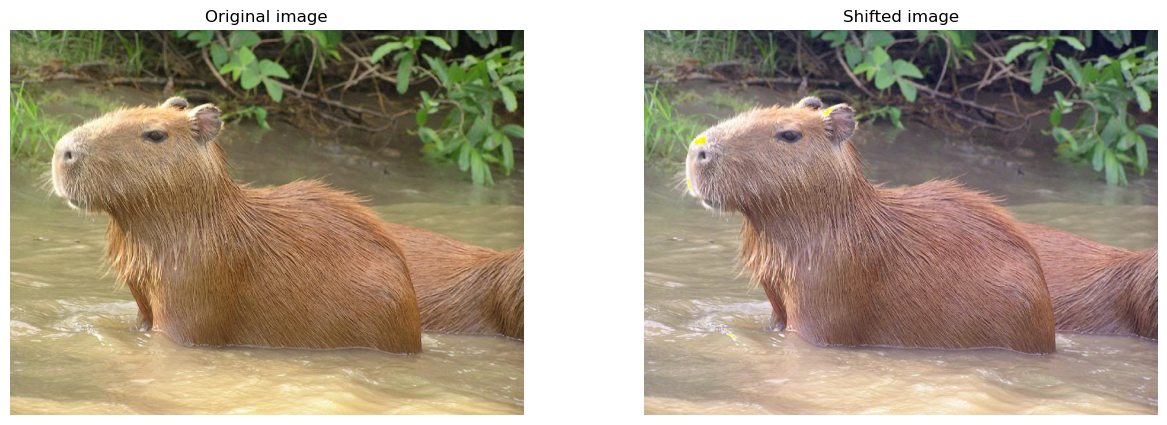

In [65]:
# plot the shifted and original image side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(array)
axs[0].set_title('Original image')
axs[0].set_axis_off()

axs[1].imshow(shifted_array)
axs[1].set_title('Shifted image')
axs[1].set_axis_off()

plt.show()

---
## 3. Image Clustering (5)

In the last exercise we have implemented the K-Means algorithm, however, as with most popular algorithms, it is already implemented in a python package. The package `scikit-learn` offers plenty of machine learning algorithms, including K-Means. Please familiarize yourself with the [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class.

We can use K-Means now to cluster the pixels of our `Capybara.jpg` image. In order to reduce the computational complexity and therefore the runtime, please decrease the height and width of the image by a factor of $1/4$. Then cluster the pixels of the image for $k=2$, $k=24$, and $k=64$ based on their color. Use `n_init=4` and `random_state=0` for the initialization of the `KMeans` class. The cluster centroids can be interpreted as the average color of the pixels in the cluster. For each pixel in the image, assign the color of the cluster centroid it belongs to. Plot the clustered images for the three different values of $k$.

 **Hint**: Since we treat every pixel as a data point with three features (RGB values) you first need to reshape the image array to an array of shape $(H \cdot W, 3)$. You can use the function `np.reshape` for that. After clustering, you can reshape the array back to the original shape of the image. You can use the function `np.reshape` for that as well.

**Hint**: The labels of the pixels, as well as the centroids of your clustering can be accessed with the `labels_` and the `cluster_centers_` attributes of the `KMeans` object.

In [85]:
from sklearn.cluster import KMeans

In [86]:
# load the image
img = Image.open('Capybara.jpg')

# resize the image by a factor of 1/2
resized_img = img.resize((img.width // 4, img.height // 4))

# convert the image to a numpy array
array = np.asarray(resized_img)

# reshape the image to a 2D array
array_2d = array.reshape(-1, 3)

In [88]:
%%time

ks = [2, 24, 64]

clustered_images = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=4).fit(array_2d)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    clustered_image = centroids[labels].astype(np.uint8).reshape(array.shape)
    clustered_images.append(clustered_image)

CPU times: user 13.8 s, sys: 3.36 s, total: 17.1 s
Wall time: 2.88 s


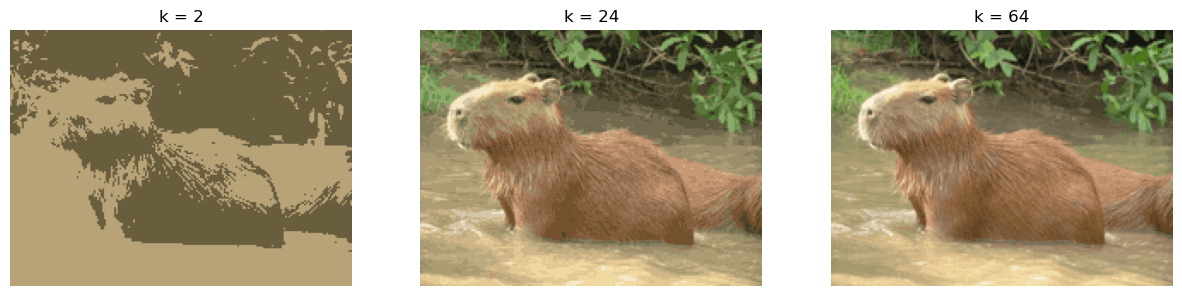

In [89]:
# plot the clustered image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, k in enumerate(ks):
    clustered_image = clustered_images[i]
    axs[i].imshow(clustered_image)
    axs[i].set_title(f'k = {k}')
    axs[i].set_axis_off()
plt.show()

---